# Домашняя работа №4

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import missingno as msno

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df =pd.read_csv(url,  delim_whitespace=True, names=names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное

In [3]:
boston_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


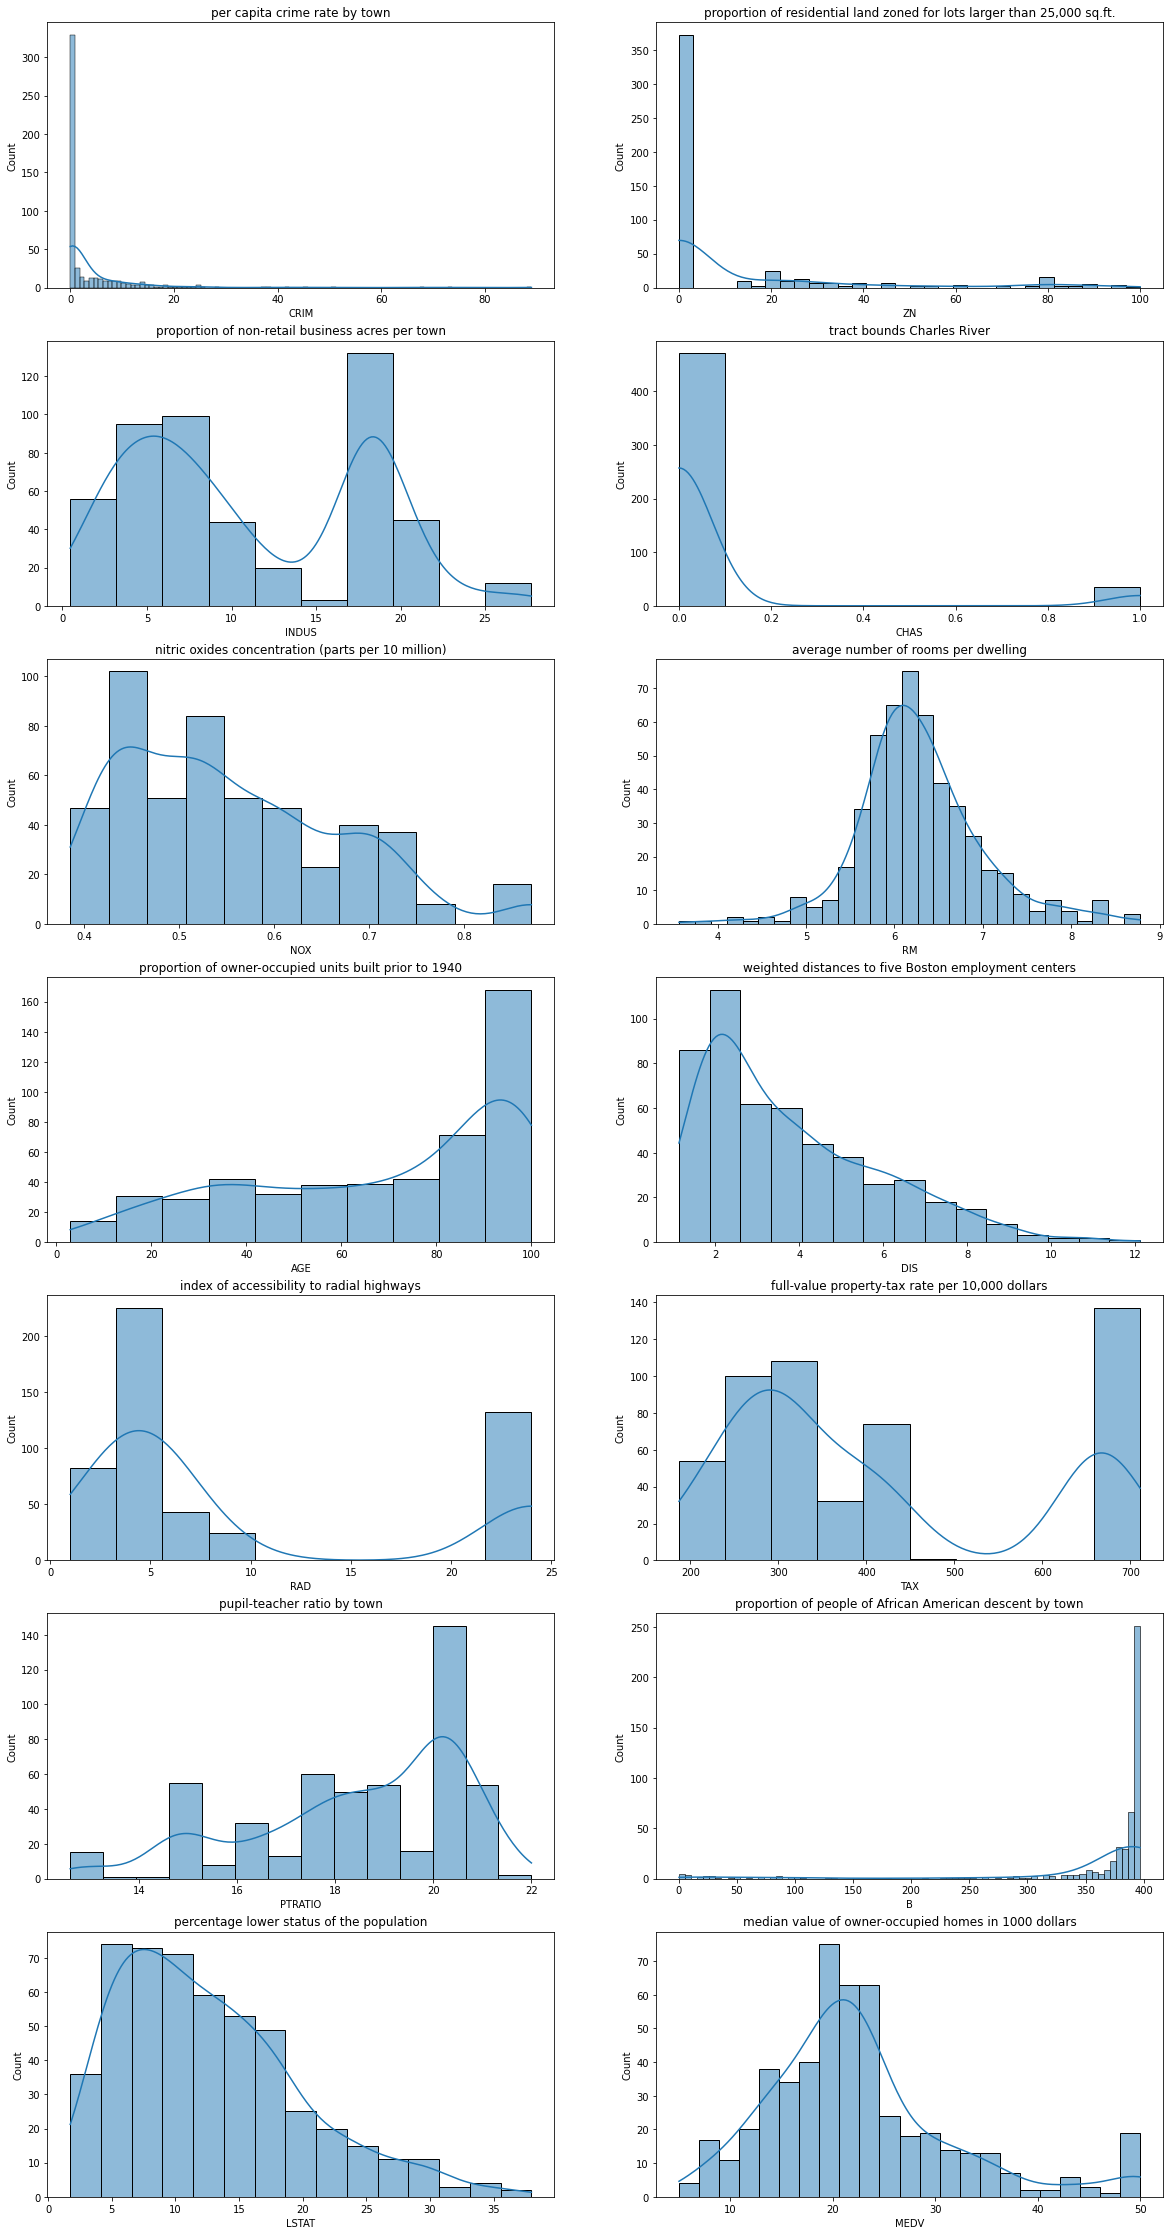

In [4]:
f, axes = plt.subplots(7,2, figsize=[20, 40])

sns.histplot(boston_df['CRIM'], ax=axes[0][0], kde=True)
sns.histplot(boston_df['ZN'], ax=axes[0][1], kde=True)

sns.histplot(boston_df['INDUS'], ax=axes[1][0], kde=True)
sns.histplot(boston_df['CHAS'], ax=axes[1][1], kde=True)

sns.histplot(boston_df['NOX'], ax=axes[2][0], kde=True)
sns.histplot(boston_df['RM'], ax=axes[2][1], kde=True)

sns.histplot(boston_df['AGE'], ax=axes[3][0], kde=True)
sns.histplot(boston_df['DIS'], ax=axes[3][1], kde=True)

sns.histplot(boston_df['RAD'], ax=axes[4][0], kde=True)
sns.histplot(boston_df['TAX'], ax=axes[4][1], kde=True)

sns.histplot(boston_df['PTRATIO'], ax=axes[5][0], kde=True)
sns.histplot(boston_df['B'], ax=axes[5][1], kde=True)

sns.histplot(boston_df['LSTAT'], ax=axes[6][0], kde=True)
sns.histplot(boston_df['MEDV'], ax=axes[6][1], kde=True)


axes[0,0].set_title('per capita crime rate by town')
axes[0,1].set_title('proportion of residential land zoned for lots larger than 25,000 sq.ft.')
axes[1,0].set_title('proportion of non-retail business acres per town')
axes[1,1].set_title('tract bounds Charles River')
axes[2,0].set_title('nitric oxides concentration (parts per 10 million)')
axes[2,1].set_title('average number of rooms per dwelling')
axes[3,0].set_title('proportion of owner-occupied units built prior to 1940')
axes[3,1].set_title('weighted distances to five Boston employment centers')
axes[4,0].set_title('index of accessibility to radial highways')
axes[4,1].set_title('full-value property-tax rate per 10,000 dollars')
axes[5,0].set_title('pupil-teacher ratio by town')
axes[5,1].set_title('proportion of people of African American descent by town')
axes[6,0].set_title('percentage lower status of the population')
axes[6,1].set_title('median value of owner-occupied homes in 1000 dollars')


plt.show()

Ответ:
1.   Нормальное - ближе всего к нормальному находится показатель RM.
        Но больше напоминает распределение Стьюдента - "хвосты" выше.
2.   Равномерное - нет
3.   Биноминальное - нет
4.   Бернулли - CHAS
5.   Геометрическое - нет
6.   Логнормальное - AGE, DIS, B,


Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

<AxesSubplot:>

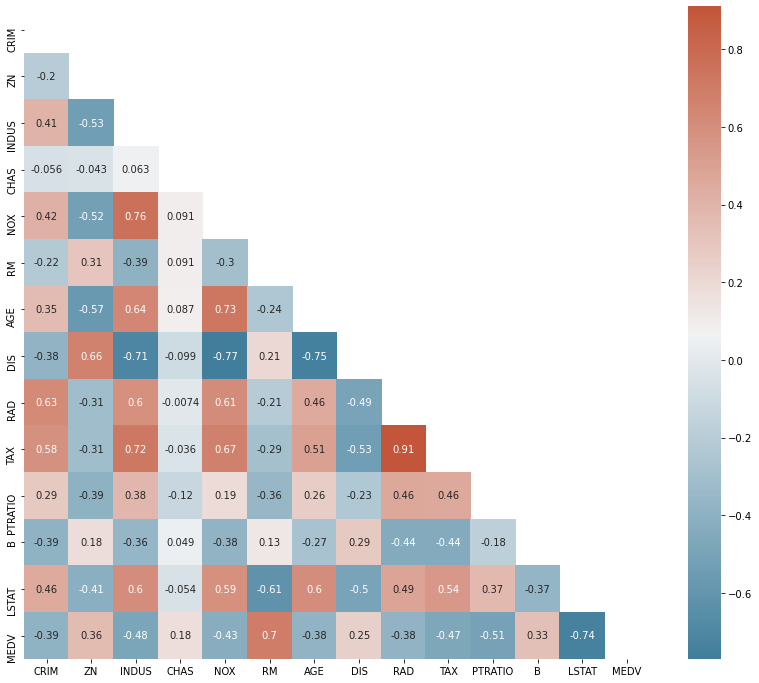

In [5]:
boston_corr = boston_df.corr()
fig, ax = plt.subplots(figsize=(14,12))
mask = np.triu(np.ones_like(boston_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(boston_corr, ax=ax, annot=True, mask=mask, cmap=cmap)


In [7]:
boston_corr['abs_MEDV'] = abs(boston_corr['MEDV'])
most_corr = list(boston_corr[:-1][ boston_corr['abs_MEDV'] >= 0.6 ].index)

print(
    f'Наиболее коррелирующие атрибуты с ценой дома: \n'
    f'{most_corr[0]}: { round(boston_corr["MEDV"].loc[most_corr[0]], 3) } \n'
    f'{most_corr[1]}: { round(boston_corr["MEDV"].loc[most_corr[1]], 3) }'
)


Наиболее коррелирующие атрибуты с ценой дома: 
RM: 0.695 
LSTAT: -0.738


<ipython-input-7-85c325373caa>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_corr = list(boston_corr[:-1][ boston_corr['abs_MEDV'] >= 0.6 ].index)


Таблица цен на дома в Бостоне

In [8]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df =pd.read_csv(url,  delim_whitespace=True, names=names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT.

1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии


In [10]:
LSTAT = np.array(boston_df['LSTAT']).reshape(-1,1)
MEDV = np.array(boston_df['MEDV']).reshape(-1,1)

In [11]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(
    LSTAT,
    MEDV,
    test_size = 0.2
)

model.fit(X_train, y_train)

predicted_y = model.predict(X_test)

In [12]:
print(
    f'Среднеквадратичная ошибка: {mean_squared_error(y_test, predicted_y)} \n'
    f'Средний модуль отклонения: {mean_absolute_error(y_test, predicted_y)}'
)


Среднеквадратичная ошибка: 37.56703849352448 
Средний модуль отклонения: 4.5182148741209325


In [13]:
#model.score(X_train, y_train)   #коэффициент детерминации R2

print(
    f'Доля дисперсии зависимой переменной MEDV, объясняемая регрессионной моделью: {round(model.score(X_train, y_train), 2)}%'
)

Доля дисперсии зависимой переменной MEDV, объясняемая регрессионной моделью: 0.55%


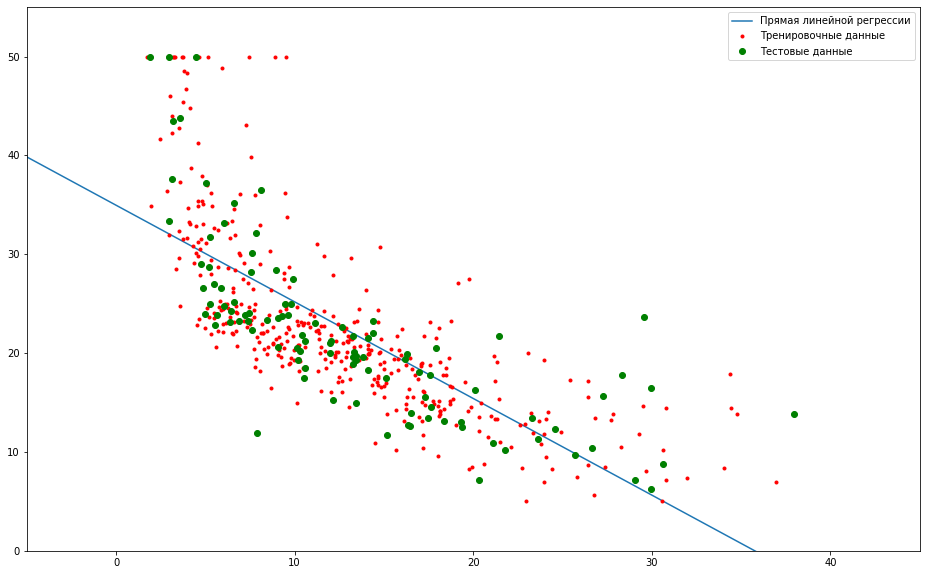

In [14]:
# plt.xlabel('freedom')
# plt.ylabel('positive affect')
# plt.title('Линейная регрессия от одной переменной')
fig= plt.figure(figsize=(16,10))

x = np.linspace(-5, 50, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)

plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-5,45)
plt.ylim(0,55)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно.

In [15]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
happiness_df =pd.read_csv(url)
happiness_df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [16]:
happiness_df.info()
#В данных есть пропуски, посмотрим на них подробнее

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         156 non-null    object 
 1   Ladder                   156 non-null    int64  
 2   SD of Ladder             156 non-null    int64  
 3   Positive affect          155 non-null    float64
 4   Negative affect          155 non-null    float64
 5   Social support           155 non-null    float64
 6   Freedom                  155 non-null    float64
 7   Corruption               148 non-null    float64
 8   Generosity               155 non-null    float64
 9   Log of GDP
per capita    152 non-null    float64
 10  Healthy life
expectancy  150 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 12.9+ KB


<AxesSubplot:>

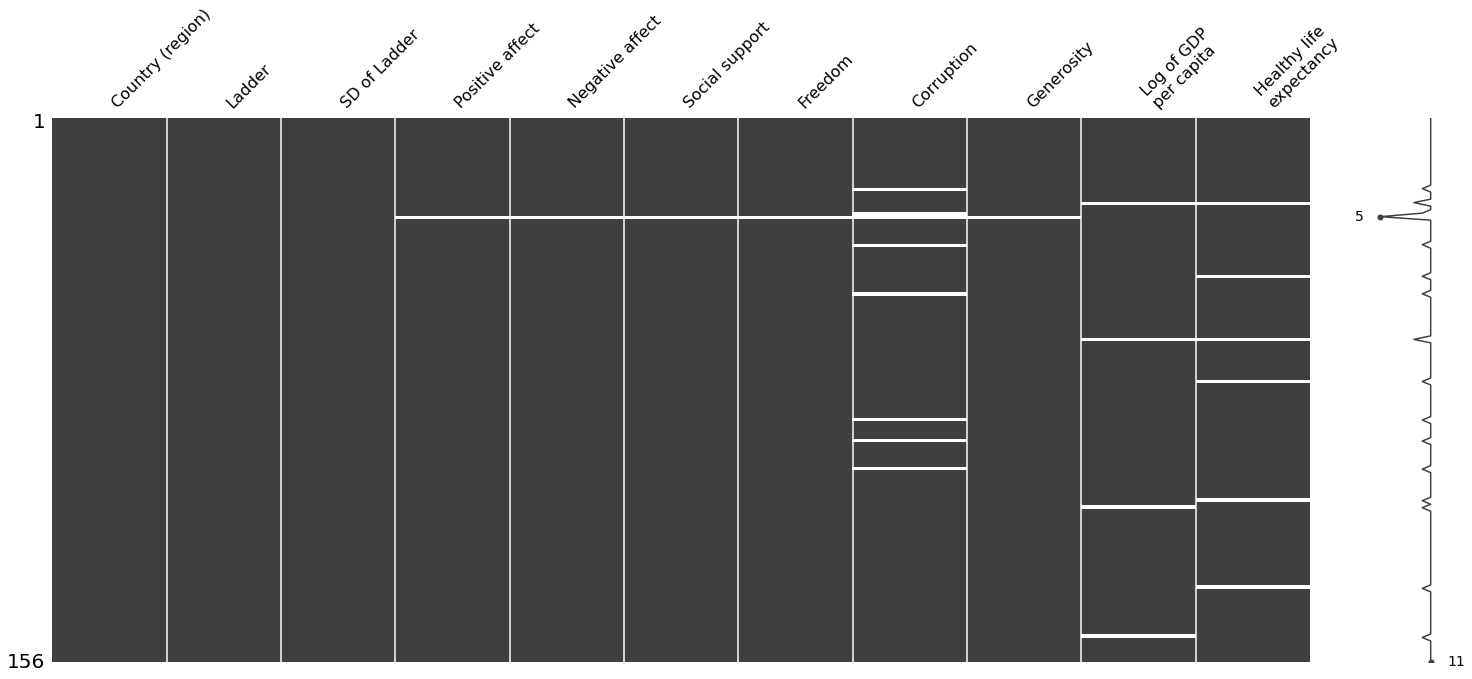

In [17]:
msno.matrix(happiness_df)
# Есть запись в которой отсутсвует больше половины данных
# Посмотрим на все записи в которых пропущены данные

In [18]:
happiness_df[ happiness_df.isna().any(axis=1) ]

# удаление всех записей с пропусками может негативно сказаться на результатах, общее количетсво данных небольшое
# имеет смысл удалить запись где отсутствует более 70% значений, а в остальных заменить пропуски на средние значения

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
20,United Arab Emirates,21,65,43.0,56.0,72.0,4.0,NaN,15.0,4.0,60.0
24,Taiwan,25,37,17.0,1.0,48.0,102.0,56.0,56.0,NaN,NaN
27,Saudi Arabia,28,93,49.0,82.0,62.0,68.0,NaN,82.0,11.0,74.0
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0
36,Bahrain,37,83,39.0,83.0,59.0,24.0,NaN,23.0,20.0,42.0
45,Kosovo,46,107,71.0,7.0,85.0,50.0,144.0,31.0,88.0,NaN
50,Kuwait,51,98,89.0,97.0,69.0,47.0,NaN,42.0,5.0,70.0
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN
75,Hong Kong,76,33,105.0,28.0,76.0,66.0,14.0,18.0,9.0,NaN
86,Turkmenistan,87,2,135.0,63.0,8.0,83.0,NaN,33.0,60.0,100.0


In [19]:
happiness_df[ happiness_df.isna().any(axis=1) ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 20 to 148
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (region)         16 non-null     object 
 1   Ladder                   16 non-null     int64  
 2   SD of Ladder             16 non-null     int64  
 3   Positive affect          15 non-null     float64
 4   Negative affect          15 non-null     float64
 5   Social support           15 non-null     float64
 6   Freedom                  15 non-null     float64
 7   Corruption               8 non-null      float64
 8   Generosity               15 non-null     float64
 9   Log of GDP
per capita    12 non-null     float64
 10  Healthy life
expectancy  10 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 1.4+ KB


In [20]:
happiness_df.dropna(thresh=6, inplace=True)

Corruption mean: 74.5, median: 74.5 
Log of GDP
per capita mean: 77.0, median: 77.0 
Healthy life
expectancy mean: 75.71812080536913, median: 76.0 



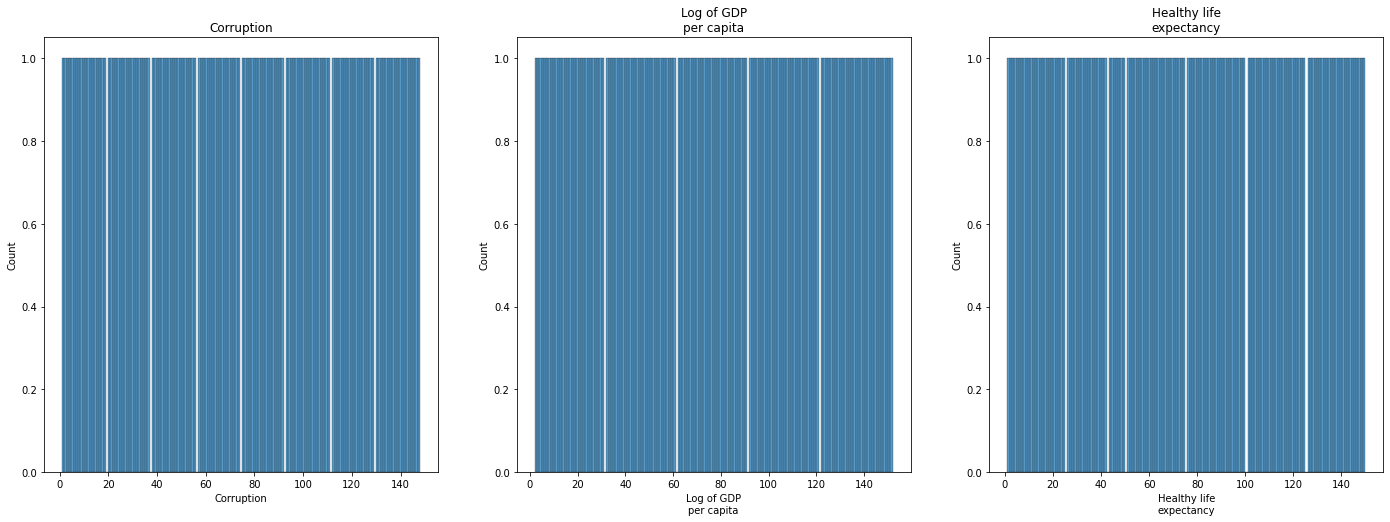

In [21]:
columns_with_na = happiness_df.columns[ happiness_df.isna().any() ].to_list()

print(
    f'{columns_with_na[0]} mean: {happiness_df[columns_with_na[0]].mean()}, median: {happiness_df[columns_with_na[0]].median()} \n'


    f'{columns_with_na[1]} mean: {happiness_df[columns_with_na[1]].mean()}, median: {happiness_df[columns_with_na[1]].median()} \n'


    f'{columns_with_na[2]} mean: {happiness_df[columns_with_na[2]].mean()}, median: {happiness_df[columns_with_na[2]].median()} \n'
)

f, axes = plt.subplots(1,3, figsize=[24,8])

sns.histplot(happiness_df[columns_with_na[0]], bins=len(happiness_df[columns_with_na[0]]), ax=axes[0])
sns.histplot(happiness_df[columns_with_na[1]], bins=len(happiness_df[columns_with_na[1]]), ax=axes[1])
sns.histplot(happiness_df[columns_with_na[2]], bins=len(happiness_df[columns_with_na[2]]), ax=axes[2])

axes[0].set_title(columns_with_na[0])
axes[1].set_title(columns_with_na[1])
axes[2].set_title(columns_with_na[2])

plt.show()

# Распределение величин является равномерным, в пропусках данных есть некоторая закономерность -
# практически все значения пропущены через равные промежутки,
# для соотнесения пропущенных значений с конкретными записями недостаточно данных

# исходя из характера распределения и пропусков можно заключить,
# что любой способ заполнения пропусков приведет к потере части информации,
# поэтому наилучшим вариантом будет замена на среднее значение

In [22]:
happiness_df[columns_with_na[0]].fillna(happiness_df[columns_with_na[0]].mean(), inplace=True)
happiness_df[columns_with_na[1]].fillna(happiness_df[columns_with_na[1]].mean(), inplace=True)
happiness_df[columns_with_na[2]].fillna(happiness_df[columns_with_na[2]].mean(), inplace=True)

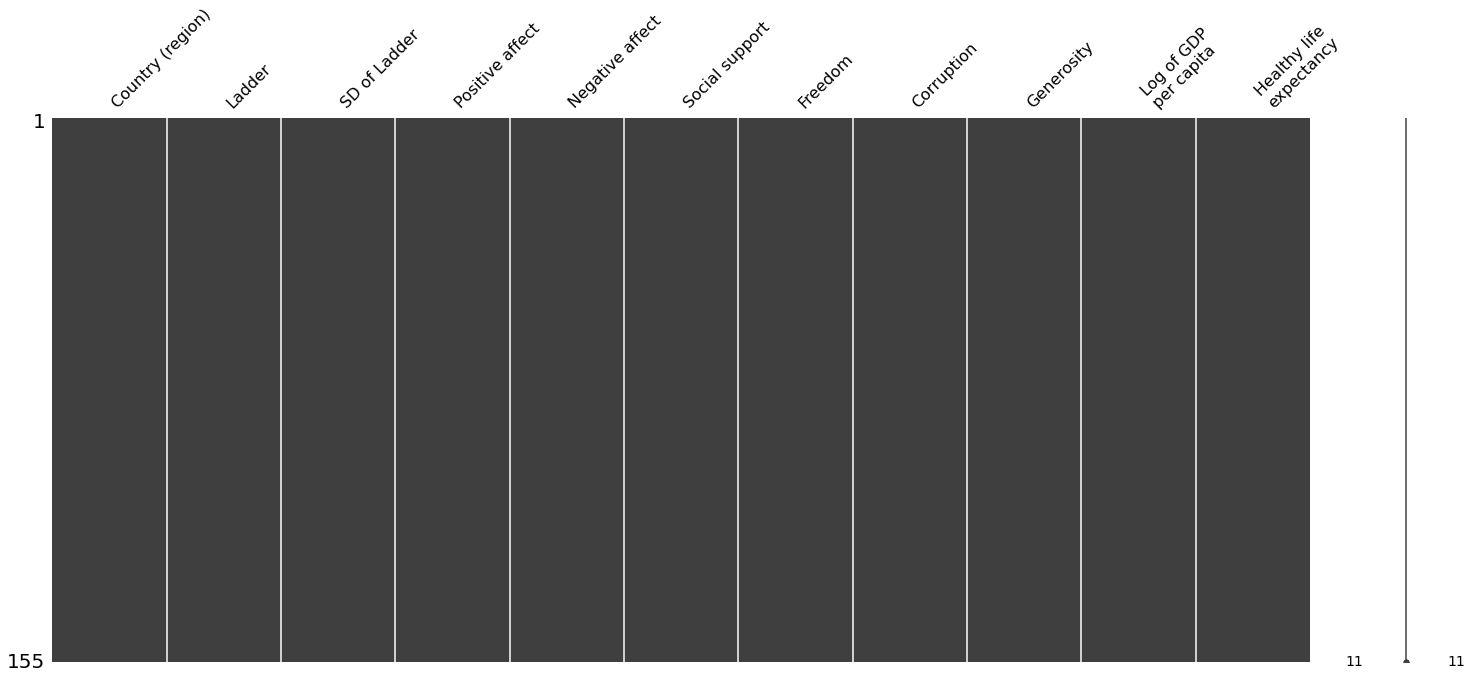

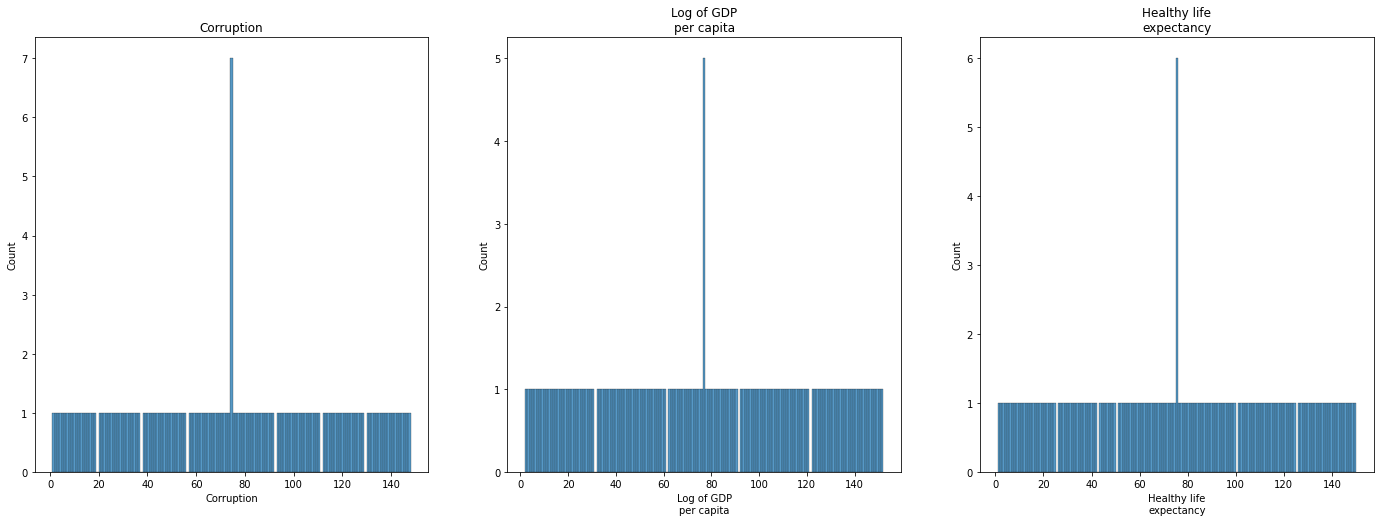

In [23]:
msno.matrix(happiness_df)
f, axes = plt.subplots(1,3, figsize=[24,8])

sns.histplot(happiness_df[columns_with_na[0]], bins=len(happiness_df[columns_with_na[0]]), ax=axes[0])
sns.histplot(happiness_df[columns_with_na[1]], bins=len(happiness_df[columns_with_na[1]]), ax=axes[1])
sns.histplot(happiness_df[columns_with_na[2]], bins=len(happiness_df[columns_with_na[2]]), ax=axes[2])

axes[0].set_title(columns_with_na[0])
axes[1].set_title(columns_with_na[1])
axes[2].set_title(columns_with_na[2])

plt.show()

#пропусков нет, но характер данных изменился, что может повлиять на корреляционный анализ

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

<AxesSubplot:>

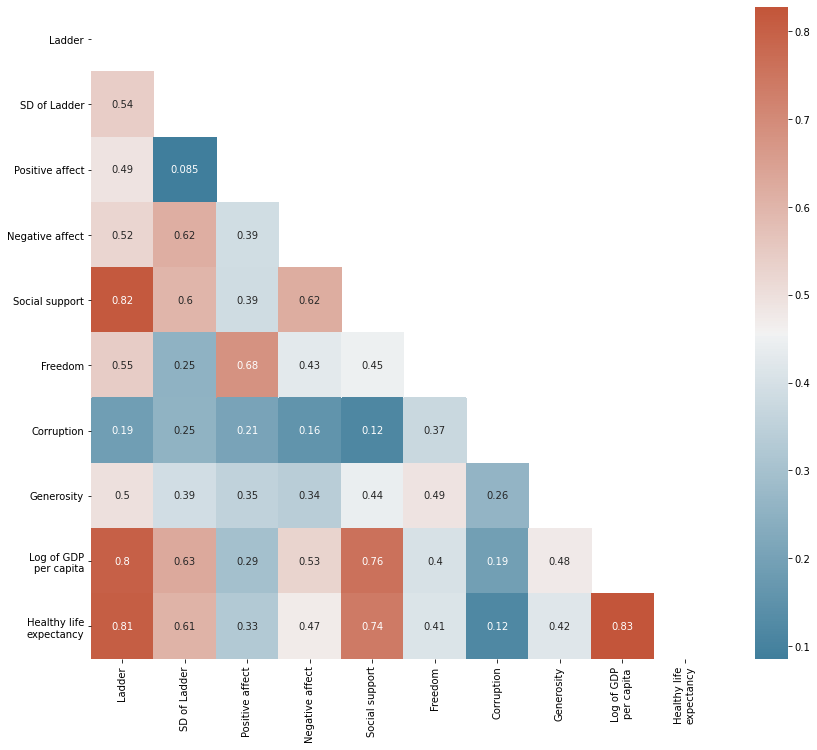

In [24]:
happiness_corr = happiness_df.corr()
fig, ax = plt.subplots(figsize=(14,12))
mask = np.triu(np.ones_like(happiness_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(happiness_corr, ax=ax, annot=True, mask=mask, cmap=cmap)

Отрицательной корреляции между данными нет. Меньше всего с другими данными коррелирует Corruption,
больше всего Healthy life expectancy.
Самый высокий показатель корреляции - Healthy life expectancy и Log of GDP per Capita, что логично.
Самый низкий - Positive affect и SD of Ladder

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

3
5
5
2
5
4
3
5
4
3


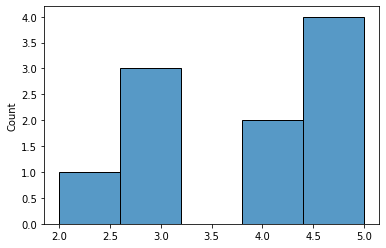

In [25]:
rolls_results = []

while len(rolls_results) < 10:
    rolls_results.append(random.randint(1,6))
    print(rolls_results[-1])

sns.histplot(rolls_results)
plt.show()

# это равномерное распределение, которые выглядит некорретно в силу маленького размера выборки

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [26]:
size = 100
num_of_sums = 1000
res_sums = np.zeros([num_of_sums])


for i in range(num_of_sums):
    random.seed(i)
    rolls_results = []
    while len(rolls_results) < size:
        rolls_results.append(random.randint(1,6))
    res_sums[i] = sum(rolls_results)/size

res_sums

array([3.49, 3.66, 3.88, 3.79, 3.35, 3.28, 3.7 , 3.34, 3.54, 3.28, 3.3 ,
       3.34, 3.57, 3.71, 3.6 , 3.3 , 3.47, 3.5 , 3.64, 3.44, 3.28, 3.47,
       3.51, 3.44, 3.58, 3.48, 3.47, 3.4 , 3.48, 3.75, 3.53, 3.29, 3.15,
       3.62, 3.38, 3.35, 3.54, 3.7 , 3.6 , 3.74, 3.45, 3.39, 3.41, 3.48,
       3.56, 3.47, 3.59, 3.61, 3.45, 3.62, 3.58, 3.64, 3.45, 3.37, 3.45,
       3.44, 3.47, 3.7 , 3.43, 3.71, 3.45, 3.36, 3.41, 3.28, 3.23, 3.53,
       3.52, 3.54, 3.65, 3.55, 3.36, 3.26, 3.42, 3.25, 3.43, 3.66, 3.52,
       3.4 , 3.61, 3.52, 3.3 , 3.32, 3.4 , 3.42, 3.57, 3.41, 3.59, 3.56,
       3.44, 3.54, 3.54, 3.82, 3.55, 3.33, 3.62, 3.7 , 3.36, 3.29, 3.54,
       3.43, 3.58, 3.43, 4.05, 3.75, 3.14, 3.73, 3.6 , 3.51, 3.45, 3.61,
       3.28, 3.86, 3.73, 3.45, 3.3 , 3.7 , 3.59, 3.5 , 3.31, 3.53, 3.54,
       3.45, 3.56, 3.41, 3.5 , 3.73, 3.57, 3.55, 3.51, 3.42, 3.64, 3.5 ,
       3.51, 3.31, 3.84, 3.39, 3.65, 3.71, 3.46, 3.67, 3.75, 3.64, 3.32,
       3.43, 3.56, 3.76, 3.37, 3.53, 3.75, 3.17, 3.

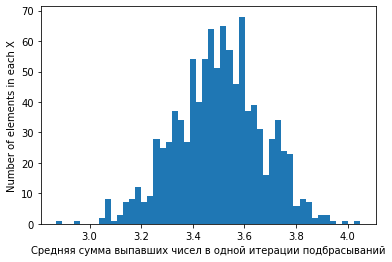

In [27]:
plt.hist(res_sums, bins=50)
plt.xlabel('Средняя сумма выпавших чисел в одной итерации подбрасываний')
plt.ylabel('Number of elements in each X')
plt.show()

Согласно ЦПТ даже если распределение из которого берутся сэпмлы не является нормальным, распределение построенное из средних большого количества выборок, взятых из первого распределения будет стремиться к нормальному при возрастании количества выборок.
Что мы и повторили кодом выше.

